In [1]:
import random
import networkx as nx
import math
import time
import matplotlib.pyplot as plt
from itertools import combinations, groupby

This block of code generate random graph with certain number of nodes 
If you call this function with (.edges(data = True)) function return graph and list with vertexes that conected and weight of conection 


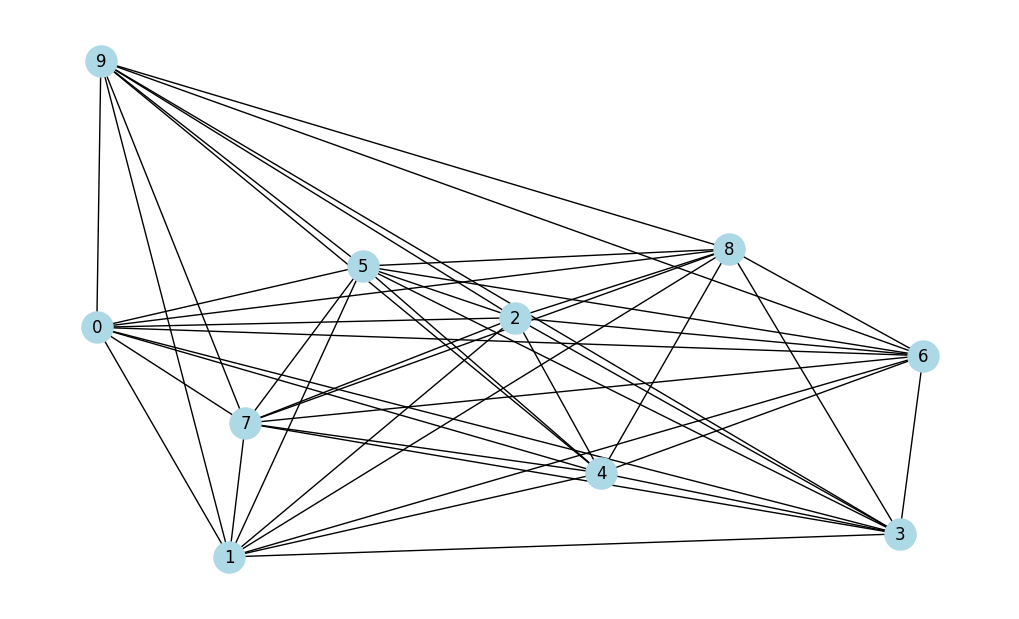

In [2]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)  
    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)
    return G
graph_data = gnp_random_connected_graph(10, 1, False, True).edges(data = True)

This block prepare data from previous function for algorithm in the net function

In [3]:
def graph_preparation(graph: list, directed: bool ) -> list:
    """
    Function change and sort record of graph from previous function.
    """
    N = 10 #nodes number
    G = gnp_random_connected_graph(N, 0.3, False, False)
    matrix = [[math.inf for _ in range(N)] for _ in range(N)]
    for u, v, d in G.edges(data=True):
        if directed is False:
            matrix[u][v] = d['weight']
            matrix[v][u] = d['weight']
        else:
            matrix[u][v] = d['weight']
    return matrix

This block of code make floyd algorithm 
Find carcass of minimal weight way from one vertex to enother 

In [4]:
def algorithm_floyd(grath: list, directed: bool) -> list:
    """
    function...
    """
    graph_data = gnp_random_connected_graph(10, 1, False, False).edges(data = True)
    N = len(grath)
    P = [[elem for elem in range(N)] for u in range(N)]
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = grath[i][k] + grath[k][j]
                if grath[i][j] > d:
                    grath[i][j] = d
                    P[i][j] = k
    return grath
print(algorithm_floyd(graph_preparation(graph_data, False), False))

[[-1412, -1427, -1451, -1436, -1433, -1428, -1456, -1486, -1641, -2576], [-1427, -1442, -1466, -1451, -1448, -1443, -1471, -1501, -1656, -2591], [-1451, -1466, -1490, -1475, -1472, -1467, -1495, -1525, -1680, -2615], [-1436, -1451, -1475, -1460, -1457, -1452, -1480, -1510, -1665, -2600], [-1433, -1448, -1472, -1457, -1454, -1449, -1477, -1507, -1662, -2597], [-1428, -1443, -1467, -1452, -1449, -1444, -1472, -1502, -1657, -2592], [-1456, -1471, -1495, -1480, -1477, -1472, -1500, -1530, -1685, -2620], [-1486, -1501, -1525, -1510, -1507, -1502, -1530, -1560, -1715, -2650], [-1641, -1656, -1680, -1665, -1662, -1657, -1685, -1715, -1870, -2805], [-2576, -2591, -2615, -2600, -2597, -2592, -2620, -2650, -2805, -3740]]


This block of code return time of the work for algorithm with defferent number of vertex

In [5]:
def time_compare():
    """
    function
    """
    num_vert = [10, 20, 50, 100, 200]
    for num in num_vert:
        graph_data = gnp_random_connected_graph(num, 1, False, False).edges(data = True)
        start_time = time.time()
        algorithm_floyd(graph_preparation(graph_data, False), False)
        print(f"{num}vertex -- %s sec " % (time.time() - start_time))
    return "my algo_result |"
print(time_compare())   

10vertex -- 0.0008738040924072266 sec 
20vertex -- 0.001024007797241211 sec 
50vertex -- 0.0006451606750488281 sec 
100vertex -- 0.0005168914794921875 sec 
200vertex -- 0.0004589557647705078 sec 
my algo_result |
